In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.constants as scc

In [2]:
d_convRyd2eV=scc.physical_constants['Rydberg constant times hc in eV']
convRyd2eV=d_convRyd2eV[0]
d_kB=scc.physical_constants['Boltzmann constant in eV/K']
kB=d_kB[0]
convcm2Ryd=1./109737.26 

In [3]:
plt.rcParams.update({'font.size': 16})
plt.rcParams['font.sans-serif'] = "FreeSans"
plt.rc('text', usetex=False)

In [4]:
file1='test_hybrid/O15CFGTFDA_20GP50'
file2='test_min4/O15CFGTFDA_20GP50'

In [5]:
lam1=pd.read_csv(file1+'.dat',sep='\s+',header='infer')
erp1=pd.read_csv(file1+'.res',sep='\s+',header=None)
lam2=pd.read_csv(file2+'.dat',sep='\s+',header='infer')
erp2=pd.read_csv(file2+'.res',sep='\s+',header=None)
# lam3=pd.read_csv(file3+'.dat',sep='\s+',header='infer')
# lam4=pd.read_csv(file4+'.dat',sep='\s+',header='infer')

In [8]:
def find_minval(lam):
    minval=lam['Y'].min(axis=0)
    iminval=lam['Y'].idxmin(axis=0)
    return lam.loc[iminval:iminval]

In [9]:
min_lam1=find_minval(lam1)
min_lam1

,Iteration,Y,var_1,var_2,var_3,var_4,var_5
38,39.0,7.255435,0.986052,2.478355,0.001,3.270383,0.001


In [10]:
min_lam2=find_minval(lam2)
min_lam2

,Iteration,Y,var_1,var_2,var_3,var_4,var_5
69,70.0,4.050341,0.810858,3.52379,0.001,4.04426,0.001


In [11]:
dum=lam1.sort_values(by='Y')
best20_lam1=dum.iloc[0:20]
best10_lam1=dum.iloc[0:10]
best5_lam1=dum.iloc[0:5]

In [12]:
dum=lam2.sort_values(by='Y')
best20_lam2=dum.iloc[0:20]
best10_lam2=dum.iloc[0:10]
best5_lam2=dum.iloc[0:5]

In [14]:
idx_b20lam1=best20_lam1.index.tolist()
idx_b10lam1=best10_lam1.index.tolist()
idx_b5lam1=best5_lam1.index.tolist()
best20_erp1=erp1.iloc[min_lam1.index[0]:min_lam1.index[0]]
best10_erp1=erp1.iloc[min_lam1.index[0]:min_lam1.index[0]]
best5_erp1=erp1.iloc[min_lam1.index[0]:min_lam1.index[0]]
for i in idx_b20lam1: best20_erp1=best20_erp1.append(erp1.loc[i])
for i in idx_b10lam1: best10_erp1=best10_erp1.append(erp1.loc[i])
for i in idx_b5lam1: best5_erp1=best5_erp1.append(erp1.loc[i])

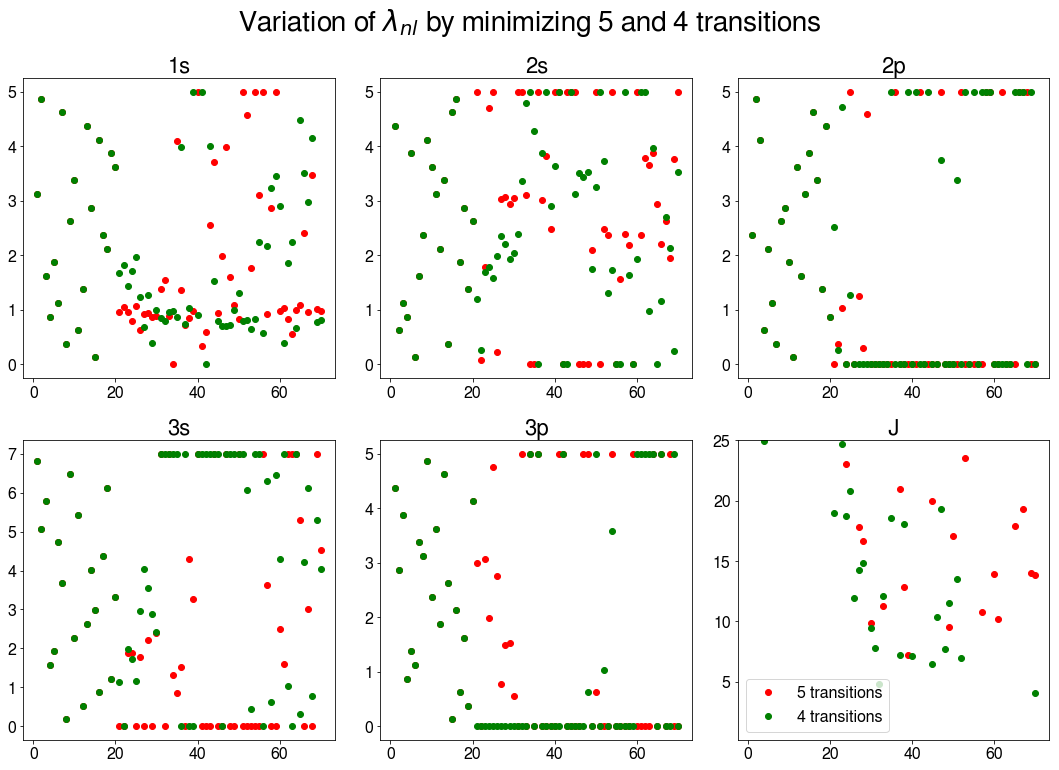

In [6]:
fig=plt.figure(figsize=(15,15))
fig.suptitle(r'Variation of $\lambda_{nl}$ by minimizing 5 and 4 transitions', fontsize=28,y=1.03)
ax1=plt.subplot(331)
ax1.set_title('1s',fontsize=22)
plt.plot(lam1['Iteration'],lam1['var_1'],'ro')
plt.plot(lam2['Iteration'],lam2['var_1'],'go')
# plt.plot(lam3['Iteration'],lam3['var_1'],'bo')
# plt.plot(lam4['Iteration'],lam4['var_1'],'co')
ax2=plt.subplot(332)
ax2.set_title('2s',fontsize=22)
plt.plot(lam1['Iteration'],lam1['var_2'],'ro')
plt.plot(lam2['Iteration'],lam2['var_2'],'go')
# plt.plot(lam3['Iteration'],lam3['var_2'],'bo')
# plt.plot(lam4['Iteration'],lam4['var_2'],'co')
ax3=plt.subplot(333)
ax3.set_title('2p',fontsize=22)
plt.plot(lam1['Iteration'],lam1['var_3'],'ro')
plt.plot(lam2['Iteration'],lam2['var_3'],'go')
# plt.plot(lam3['Iteration'],lam3['var_3'],'bo')
# plt.plot(lam4['Iteration'],lam4['var_3'],'co')
ax4=plt.subplot(334)
ax4.set_title('3s',fontsize=22)
plt.plot(lam1['Iteration'],lam1['var_4'],'ro')
plt.plot(lam2['Iteration'],lam2['var_4'],'go')
# plt.plot(lam3['Iteration'],lam3['var_4'],'bo')
# plt.plot(lam4['Iteration'],lam4['var_4'],'co')
ax5=plt.subplot(335)
ax5.set_title('3p',fontsize=22)
plt.plot(lam1['Iteration'],lam1['var_5'],'ro')
plt.plot(lam2['Iteration'],lam2['var_5'],'go')
# plt.plot(lam3['Iteration'],lam3['var_5'],'bo')
# plt.plot(lam4['Iteration'],lam4['var_5'],'co')
ax6=plt.subplot(336)
ax6.set_title('J',fontsize=22)
plt.plot(lam1['Iteration'],lam1['Y'],'ro',label='5 transitions')
plt.plot(lam2['Iteration'],lam2['Y'],'go',label='4 transitions')
# plt.plot(lam3['Iteration'],lam3['Y'],'bo',label='20-80')
# plt.plot(lam4['Iteration'],lam4['Y'],'co',label='100-100')
plt.ylim(0.2,25)
plt.legend(loc='best',fontsize=16)
# plt.yscale('log')
plt.tight_layout()
plt.show()

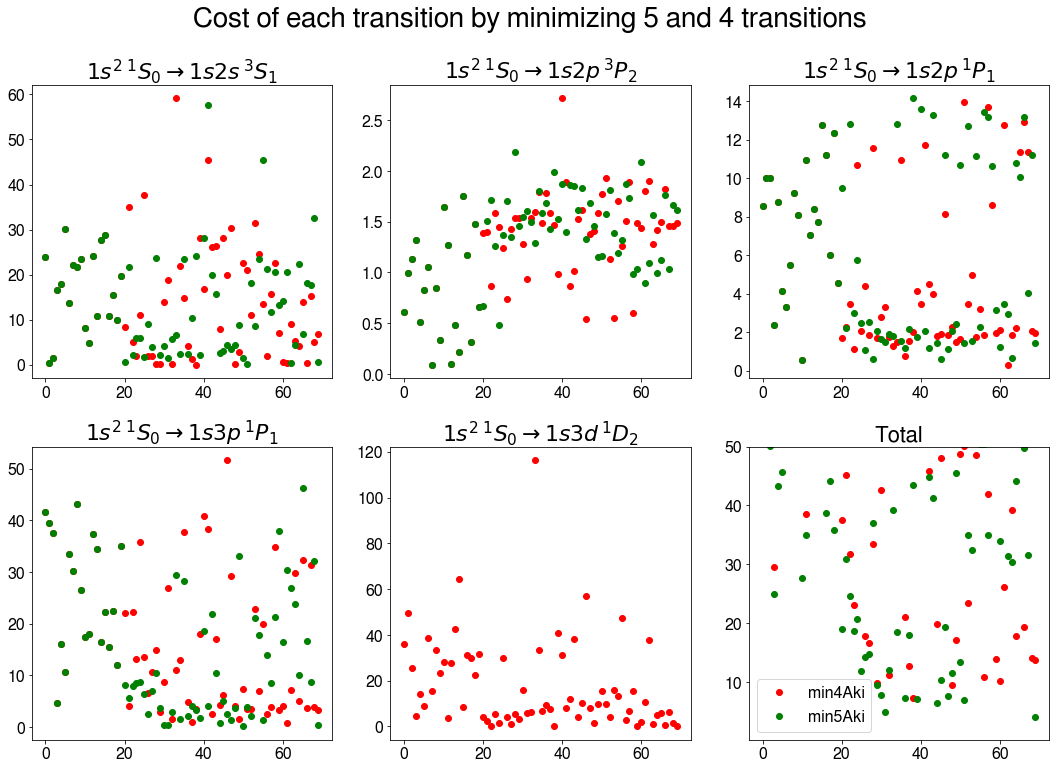

In [7]:
fig=plt.figure(figsize=(15,15))
fig.suptitle('Cost of each transition by minimizing 5 and 4 transitions', fontsize=28,y=1.03)
ax1=plt.subplot(331)
ax1.set_title(r'$1s^2 \,^1S_0 \rightarrow 1s2s \,^3S_1$',fontsize=22)
plt.plot(erp1.index,erp1[1],'ro')
plt.plot(erp2.index,erp2[1],'go')
ax2=plt.subplot(332)
ax2.set_title(r'$1s^2 \,^1S_0 \rightarrow 1s2p \,^3P_2$',fontsize=22)
plt.plot(erp1.index,erp1[2],'ro')
plt.plot(erp2.index,erp2[2],'go')
ax3=plt.subplot(333)
ax3.set_title(r'$1s^2 \,^1S_0 \rightarrow 1s2p \,^1P_1$',fontsize=22)
plt.plot(erp1.index,erp1[3],'ro')
plt.plot(erp2.index,erp2[3],'go')
ax4=plt.subplot(334)
ax4.set_title(r'$1s^2 \,^1S_0 \rightarrow 1s3p \,^1P_1$',fontsize=22)
plt.plot(erp1.index,erp1[4],'ro')
plt.plot(erp2.index,erp2[4],'go')
ax5=plt.subplot(335)
ax5.set_title(r'$1s^2 \,^1S_0 \rightarrow 1s3d \,^1D_2$',fontsize=22)
plt.plot(erp1.index,erp1[5],'ro')
# plt.plot(erp2.index,erp2[5],'go')
ax6=plt.subplot(336)
ax6.set_title('Total',fontsize=22)
plt.plot(erp1.index,erp1[0],'ro',label='min4Aki')
plt.plot(erp2.index,erp2[0],'go',label='min5Aki')
plt.ylim(0.2,50)
plt.legend(loc='best',fontsize=16)
# plt.yscale('log')
plt.tight_layout()
plt.show()

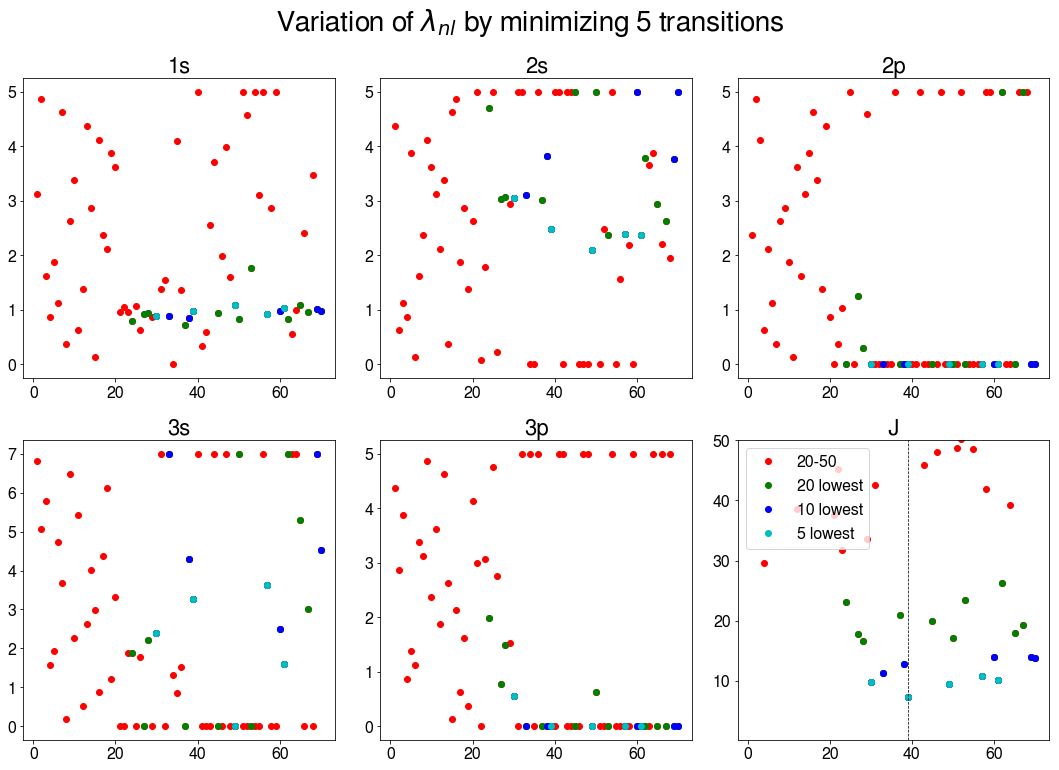

In [13]:
fig=plt.figure(figsize=(15,15))
fig.suptitle(r'Variation of $\lambda_{nl}$ by minimizing 5 transitions', fontsize=28,y=1.03)
ax1=plt.subplot(331)
ax1.set_title('1s',fontsize=22)
plt.plot(lam1['Iteration'],lam1['var_1'],'ro')
plt.plot(best20_lam1['Iteration'],best20_lam1['var_1'],'go')
plt.plot(best10_lam1['Iteration'],best10_lam1['var_1'],'bo')
plt.plot(best5_lam1['Iteration'],best5_lam1['var_1'],'co')
ax2=plt.subplot(332)
ax2.set_title('2s',fontsize=22)
plt.plot(lam1['Iteration'],lam1['var_2'],'ro')
plt.plot(best20_lam1['Iteration'],best20_lam1['var_2'],'go')
plt.plot(best10_lam1['Iteration'],best10_lam1['var_2'],'bo')
plt.plot(best5_lam1['Iteration'],best5_lam1['var_2'],'co')
ax3=plt.subplot(333)
ax3.set_title('2p',fontsize=22)
plt.plot(lam1['Iteration'],lam1['var_3'],'ro')
plt.plot(best20_lam1['Iteration'],best20_lam1['var_3'],'go')
plt.plot(best10_lam1['Iteration'],best10_lam1['var_3'],'bo')
plt.plot(best5_lam1['Iteration'],best5_lam1['var_3'],'co')
ax4=plt.subplot(334)
ax4.set_title('3s',fontsize=22)
plt.plot(lam1['Iteration'],lam1['var_4'],'ro')
plt.plot(best20_lam1['Iteration'],best20_lam1['var_4'],'go')
plt.plot(best10_lam1['Iteration'],best10_lam1['var_4'],'bo')
plt.plot(best5_lam1['Iteration'],best5_lam1['var_4'],'co')
ax5=plt.subplot(335)
ax5.set_title('3p',fontsize=22)
plt.plot(lam1['Iteration'],lam1['var_5'],'ro')
plt.plot(best20_lam1['Iteration'],best20_lam1['var_5'],'go')
plt.plot(best10_lam1['Iteration'],best10_lam1['var_5'],'bo')
plt.plot(best5_lam1['Iteration'],best5_lam1['var_5'],'co')
ax6=plt.subplot(336)
ax6.set_title('J',fontsize=22)
plt.plot(lam1['Iteration'],lam1['Y'],'ro',label='20-50')
plt.plot(best20_lam1['Iteration'],best20_lam1['Y'],'go',label='20 lowest')
plt.plot(best10_lam1['Iteration'],best10_lam1['Y'],'bo',label='10 lowest')
plt.plot(best5_lam1['Iteration'],best5_lam1['Y'],'co',label='5 lowest')
plt.axvline(min_lam1.iloc[0]['Iteration'],linewidth=0.75,linestyle='--', color='k')
plt.ylim(0.2,50)
plt.legend(loc='best',fontsize=16)
# plt.yscale('log')
plt.tight_layout()
plt.show()

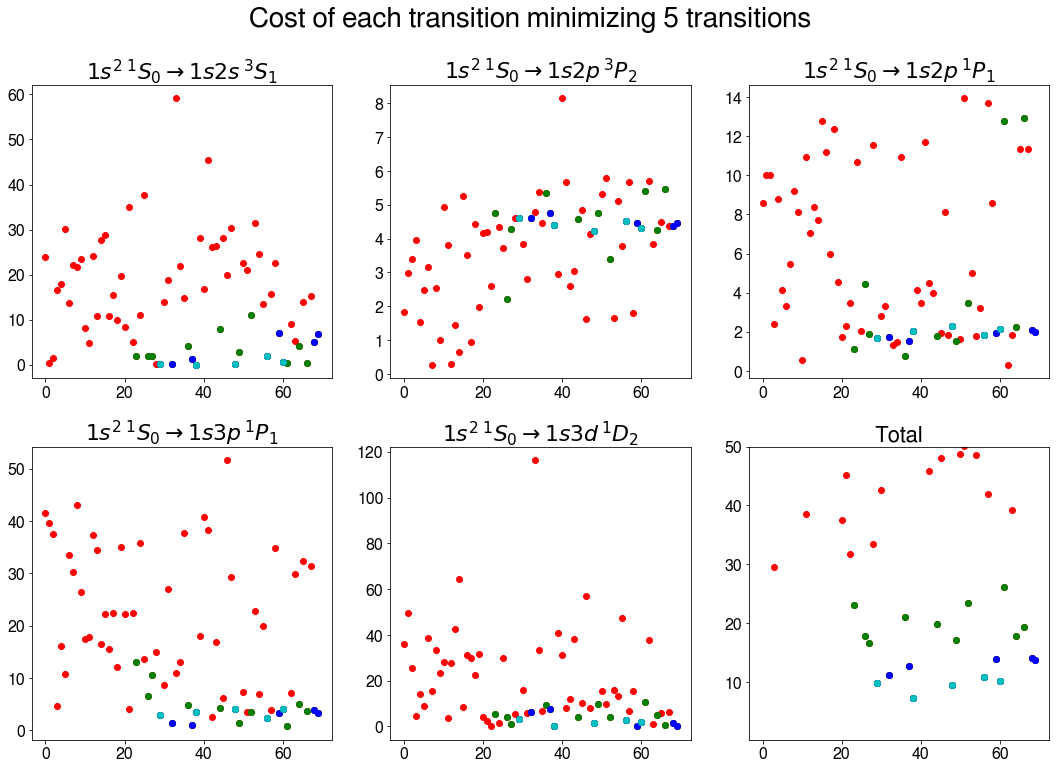

In [15]:
fig=plt.figure(figsize=(15,15))
fig.suptitle('Cost of each transition minimizing 5 transitions', fontsize=28,y=1.03)
ax1=plt.subplot(331)
ax1.set_title(r'$1s^2 \,^1S_0 \rightarrow 1s2s \,^3S_1$',fontsize=22)
plt.plot(erp1.index,erp1[1],'ro')
plt.plot(best20_erp1.index,best20_erp1[1],'go')
plt.plot(best10_erp1.index,best10_erp1[1],'bo')
plt.plot(best5_erp1.index,best5_erp1[1],'co')
ax2=plt.subplot(332)
ax2.set_title(r'$1s^2 \,^1S_0 \rightarrow 1s2p \,^3P_2$',fontsize=22)
plt.plot(erp1.index,erp1[2]*3,'ro')
plt.plot(best20_erp1.index,best20_erp1[2]*3,'go')
plt.plot(best10_erp1.index,best10_erp1[2]*3,'bo')
plt.plot(best5_erp1.index,best5_erp1[2]*3,'co')
ax3=plt.subplot(333)
ax3.set_title(r'$1s^2 \,^1S_0 \rightarrow 1s2p \,^1P_1$',fontsize=22)
plt.plot(erp1.index,erp1[3],'ro')
plt.plot(best20_erp1.index,best20_erp1[3],'go')
plt.plot(best10_erp1.index,best10_erp1[3],'bo')
plt.plot(best5_erp1.index,best5_erp1[3],'co')
ax4=plt.subplot(334)
ax4.set_title(r'$1s^2 \,^1S_0 \rightarrow 1s3p \,^1P_1$',fontsize=22)
plt.plot(erp1.index,erp1[4],'ro')
plt.plot(best20_erp1.index,best20_erp1[4],'go')
plt.plot(best10_erp1.index,best10_erp1[4],'bo')
plt.plot(best5_erp1.index,best5_erp1[4],'co')
ax5=plt.subplot(335)
ax5.set_title(r'$1s^2 \,^1S_0 \rightarrow 1s3d \,^1D_2$',fontsize=22)
plt.plot(erp1.index,erp1[5],'ro')
plt.plot(best20_erp1.index,best20_erp1[5],'go')
plt.plot(best10_erp1.index,best10_erp1[5],'bo')
plt.plot(best5_erp1.index,best5_erp1[5],'co')
ax6=plt.subplot(336)
ax6.set_title('Total',fontsize=22)
plt.plot(erp1.index,erp1[0],'ro')
plt.plot(best20_erp1.index,best20_erp1[0],'go',label='min4Aki')
plt.plot(best10_erp1.index,best10_erp1[0],'bo',label='min5Aki')
plt.plot(best5_erp1.index,best5_erp1[0],'co')
plt.ylim(0.2,50)
# plt.legend(loc='best',fontsize=16)
# plt.yscale('log')
plt.tight_layout()
plt.show()

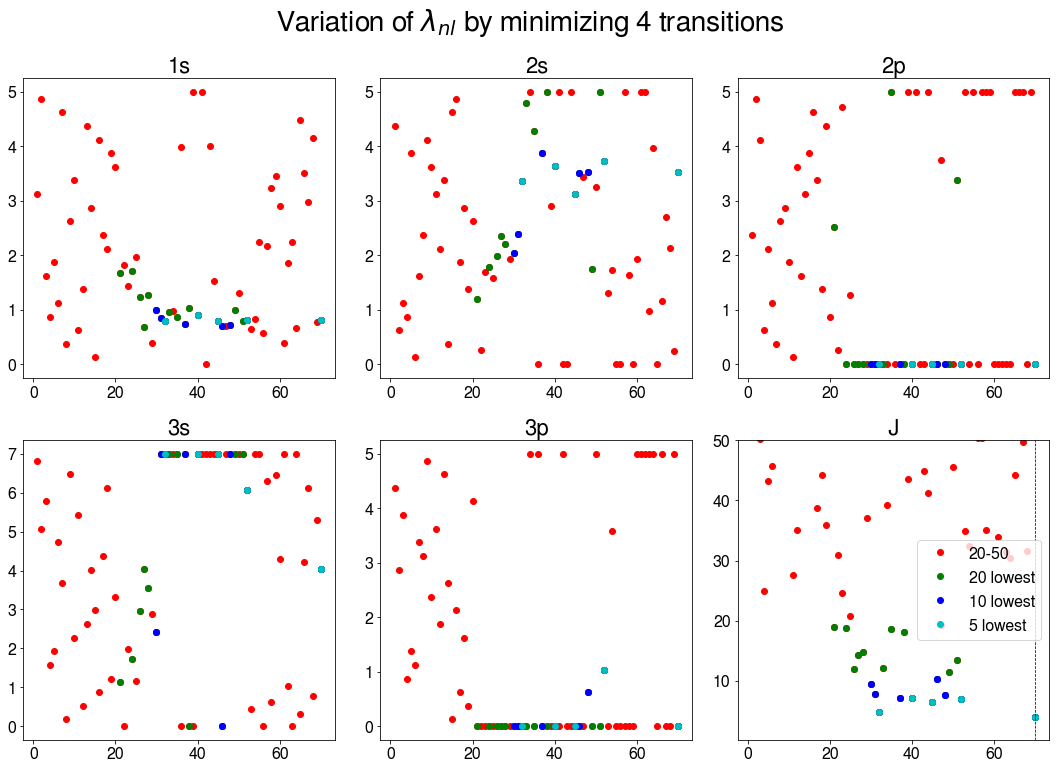

In [16]:
fig=plt.figure(figsize=(15,15))
fig.suptitle(r'Variation of $\lambda_{nl}$ by minimizing 4 transitions', fontsize=28,y=1.03)
ax1=plt.subplot(331)
ax1.set_title('1s',fontsize=22)
plt.plot(lam2['Iteration'],lam2['var_1'],'ro')
plt.plot(best20_lam2['Iteration'],best20_lam2['var_1'],'go')
plt.plot(best10_lam2['Iteration'],best10_lam2['var_1'],'bo')
plt.plot(best5_lam2['Iteration'],best5_lam2['var_1'],'co')
ax2=plt.subplot(332)
ax2.set_title('2s',fontsize=22)
plt.plot(lam2['Iteration'],lam2['var_2'],'ro')
plt.plot(best20_lam2['Iteration'],best20_lam2['var_2'],'go')
plt.plot(best10_lam2['Iteration'],best10_lam2['var_2'],'bo')
plt.plot(best5_lam2['Iteration'],best5_lam2['var_2'],'co')
ax3=plt.subplot(333)
ax3.set_title('2p',fontsize=22)
plt.plot(lam2['Iteration'],lam2['var_3'],'ro')
plt.plot(best20_lam2['Iteration'],best20_lam2['var_3'],'go')
plt.plot(best10_lam2['Iteration'],best10_lam2['var_3'],'bo')
plt.plot(best5_lam2['Iteration'],best5_lam2['var_3'],'co')
ax4=plt.subplot(334)
ax4.set_title('3s',fontsize=22)
plt.plot(lam2['Iteration'],lam2['var_4'],'ro')
plt.plot(best20_lam2['Iteration'],best20_lam2['var_4'],'go')
plt.plot(best10_lam2['Iteration'],best10_lam2['var_4'],'bo')
plt.plot(best5_lam2['Iteration'],best5_lam2['var_4'],'co')
ax5=plt.subplot(335)
ax5.set_title('3p',fontsize=22)
plt.plot(lam2['Iteration'],lam2['var_5'],'ro')
plt.plot(best20_lam2['Iteration'],best20_lam2['var_5'],'go')
plt.plot(best10_lam2['Iteration'],best10_lam2['var_5'],'bo')
plt.plot(best5_lam2['Iteration'],best5_lam2['var_5'],'co')
ax6=plt.subplot(336)
ax6.set_title('J',fontsize=22)
plt.plot(lam2['Iteration'],lam2['Y'],'ro',label='20-50')
plt.plot(best20_lam2['Iteration'],best20_lam2['Y'],'go',label='20 lowest')
plt.plot(best10_lam2['Iteration'],best10_lam2['Y'],'bo',label='10 lowest')
plt.plot(best5_lam2['Iteration'],best5_lam2['Y'],'co',label='5 lowest')
plt.axvline(min_lam2.iloc[0]['Iteration'],linewidth=0.75,linestyle='--', color='k')
plt.ylim(0.2,50)
plt.legend(loc='best',fontsize=16)
# plt.yscale('log')
plt.tight_layout()
plt.show()

In [17]:
idx_b20lam2=best20_lam2.index.tolist()
idx_b10lam2=best10_lam2.index.tolist()
idx_b5lam2=best5_lam2.index.tolist()
best20_erp2=erp2.iloc[min_lam2.index[0]:min_lam2.index[0]]
best10_erp2=erp2.iloc[min_lam2.index[0]:min_lam2.index[0]]
best5_erp2=erp2.iloc[min_lam2.index[0]:min_lam2.index[0]]
for i in idx_b20lam2: best20_erp2=best20_erp2.append(erp2.loc[i])
for i in idx_b10lam2: best10_erp2=best10_erp2.append(erp2.loc[i])
for i in idx_b5lam2: best5_erp2=best5_erp2.append(erp2.loc[i])

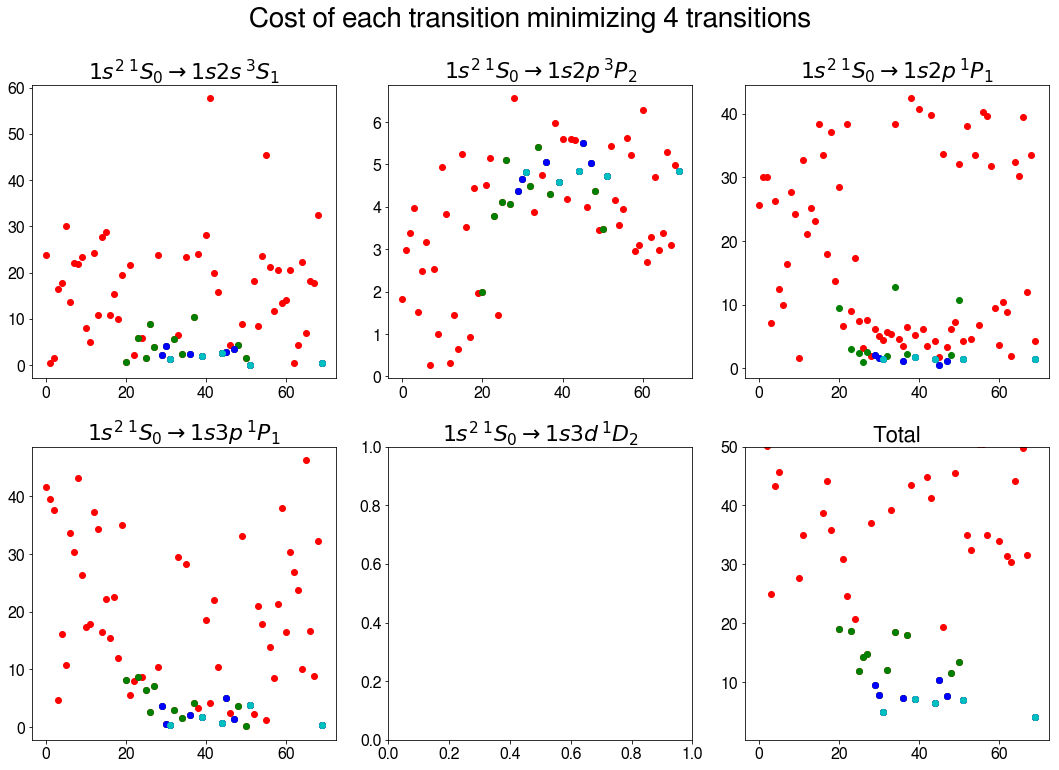

In [18]:
fig=plt.figure(figsize=(15,15))
fig.suptitle('Cost of each transition minimizing 4 transitions', fontsize=28,y=1.03)
ax1=plt.subplot(331)
ax1.set_title(r'$1s^2 \,^1S_0 \rightarrow 1s2s \,^3S_1$',fontsize=22)
plt.plot(erp2.index,erp2[1],'ro')
plt.plot(best20_erp2.index,best20_erp2[1],'go')
plt.plot(best10_erp2.index,best10_erp2[1],'bo')
plt.plot(best5_erp2.index,best5_erp2[1],'co')
ax2=plt.subplot(332)
ax2.set_title(r'$1s^2 \,^1S_0 \rightarrow 1s2p \,^3P_2$',fontsize=22)
plt.plot(erp2.index,erp2[2]*3,'ro')
plt.plot(best20_erp2.index,best20_erp2[2]*3,'go')
plt.plot(best10_erp2.index,best10_erp2[2]*3,'bo')
plt.plot(best5_erp2.index,best5_erp2[2]*3,'co')
ax3=plt.subplot(333)
ax3.set_title(r'$1s^2 \,^1S_0 \rightarrow 1s2p \,^1P_1$',fontsize=22)
plt.plot(erp2.index,erp2[3]*3,'ro')
plt.plot(best20_erp2.index,best20_erp2[3],'go')
plt.plot(best10_erp2.index,best10_erp2[3],'bo')
plt.plot(best5_erp2.index,best5_erp2[3],'co')
ax4=plt.subplot(334)
ax4.set_title(r'$1s^2 \,^1S_0 \rightarrow 1s3p \,^1P_1$',fontsize=22)
plt.plot(erp2.index,erp2[4],'ro')
plt.plot(best20_erp2.index,best20_erp2[4],'go')
plt.plot(best10_erp2.index,best10_erp2[4],'bo')
plt.plot(best5_erp2.index,best5_erp2[4],'co')
ax5=plt.subplot(335)
ax5.set_title(r'$1s^2 \,^1S_0 \rightarrow 1s3d \,^1D_2$',fontsize=22)
# plt.plot(erp2.index,erp2[5],'ro')
# plt.plot(best20_erp2.index,best20_erp2[5],'go')
# plt.plot(best10_erp2.index,best10_erp2[5],'bo')
# plt.plot(best5_erp2.index,best5_erp2[5],'co')
ax6=plt.subplot(336)
ax6.set_title('Total',fontsize=22)
plt.plot(erp2.index,erp2[0],'ro')
plt.plot(best20_erp2.index,best20_erp2[0],'go',label='min4Aki')
plt.plot(best10_erp2.index,best10_erp2[0],'bo',label='min5Aki')
plt.plot(best5_erp2.index,best5_erp2[0],'co')
plt.ylim(0.2,50)
# plt.legend(loc='best',fontsize=16)
# plt.yscale('log')
plt.tight_layout()
plt.show()

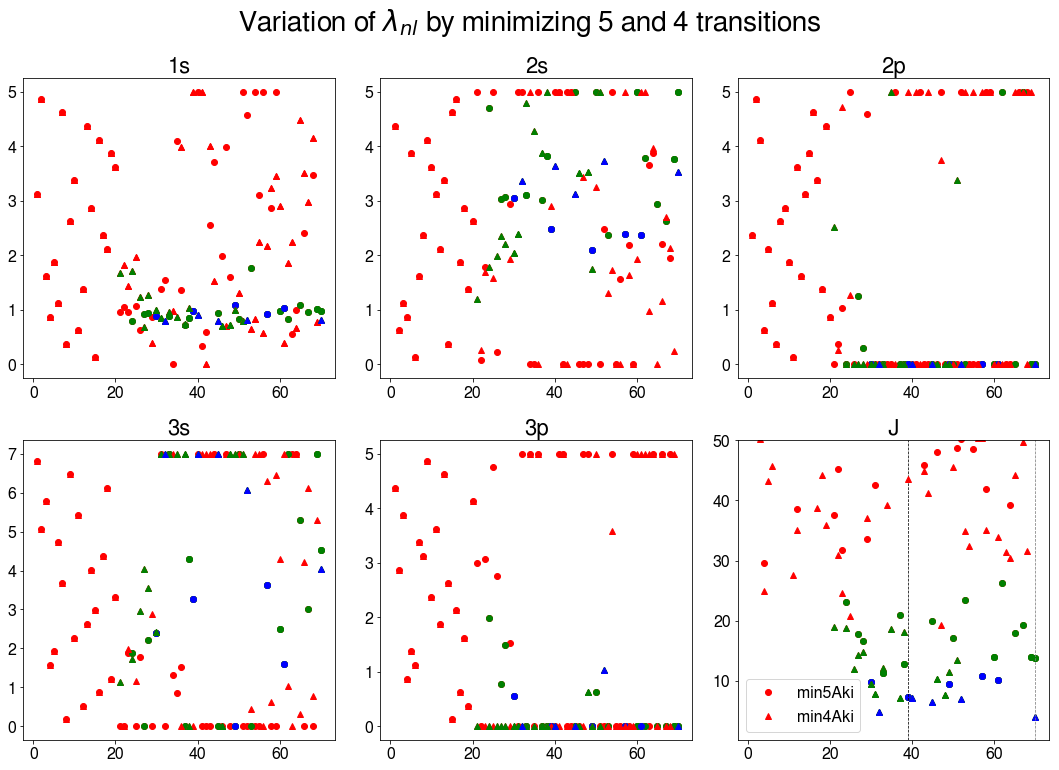

In [19]:
fig=plt.figure(figsize=(15,15))
fig.suptitle(r'Variation of $\lambda_{nl}$ by minimizing 5 and 4 transitions', fontsize=28,y=1.03)
ax1=plt.subplot(331)
ax1.set_title('1s',fontsize=22)
plt.plot(lam1['Iteration'],lam1['var_1'],'ro')
plt.plot(best20_lam1['Iteration'],best20_lam1['var_1'],'go')
plt.plot(best10_lam1['Iteration'],best10_lam1['var_1'],'go')
plt.plot(best5_lam1['Iteration'],best5_lam1['var_1'],'bo')
plt.plot(lam2['Iteration'],lam2['var_1'],'r^')
plt.plot(lam2['Iteration'],lam2['var_1'],'r^')
plt.plot(best20_lam2['Iteration'],best20_lam2['var_1'],'g^')
plt.plot(best10_lam2['Iteration'],best10_lam2['var_1'],'g^')
plt.plot(best5_lam2['Iteration'],best5_lam2['var_1'],'b^')

ax2=plt.subplot(332)
ax2.set_title('2s',fontsize=22)
plt.plot(lam1['Iteration'],lam1['var_2'],'ro')
plt.plot(best20_lam1['Iteration'],best20_lam1['var_2'],'go')
plt.plot(best10_lam1['Iteration'],best10_lam1['var_2'],'go')
plt.plot(best5_lam1['Iteration'],best5_lam1['var_2'],'bo')
plt.plot(lam2['Iteration'],lam2['var_2'],'r^')
plt.plot(best20_lam2['Iteration'],best20_lam2['var_2'],'g^')
plt.plot(best10_lam2['Iteration'],best10_lam2['var_2'],'g^')
plt.plot(best5_lam2['Iteration'],best5_lam2['var_2'],'b^')

ax3=plt.subplot(333)
ax3.set_title('2p',fontsize=22)
plt.plot(lam1['Iteration'],lam1['var_3'],'ro')
plt.plot(best20_lam1['Iteration'],best20_lam1['var_3'],'go')
plt.plot(best10_lam1['Iteration'],best10_lam1['var_3'],'go')
plt.plot(best5_lam1['Iteration'],best5_lam1['var_3'],'bo')
plt.plot(lam2['Iteration'],lam2['var_3'],'r^')
plt.plot(best20_lam2['Iteration'],best20_lam2['var_3'],'g^')
plt.plot(best10_lam2['Iteration'],best10_lam2['var_3'],'g^')
plt.plot(best5_lam2['Iteration'],best5_lam2['var_3'],'b^')

ax4=plt.subplot(334)
ax4.set_title('3s',fontsize=22)
plt.plot(lam1['Iteration'],lam1['var_4'],'ro')
plt.plot(best20_lam1['Iteration'],best20_lam1['var_4'],'go')
plt.plot(best10_lam1['Iteration'],best10_lam1['var_4'],'go')
plt.plot(best5_lam1['Iteration'],best5_lam1['var_4'],'bo')
plt.plot(lam2['Iteration'],lam2['var_4'],'r^')
plt.plot(best20_lam2['Iteration'],best20_lam2['var_4'],'g^')
plt.plot(best10_lam2['Iteration'],best10_lam2['var_4'],'g^')
plt.plot(best5_lam2['Iteration'],best5_lam2['var_4'],'b^')

ax5=plt.subplot(335)
ax5.set_title('3p',fontsize=22)
plt.plot(lam1['Iteration'],lam1['var_5'],'ro')
plt.plot(best20_lam1['Iteration'],best20_lam1['var_5'],'go')
plt.plot(best10_lam1['Iteration'],best10_lam1['var_5'],'go')
plt.plot(best5_lam1['Iteration'],best5_lam1['var_5'],'bo')
plt.plot(lam2['Iteration'],lam2['var_5'],'r^')
plt.plot(best20_lam2['Iteration'],best20_lam2['var_5'],'g^')
plt.plot(best10_lam2['Iteration'],best10_lam2['var_5'],'g^')
plt.plot(best5_lam2['Iteration'],best5_lam2['var_5'],'b^')

ax6=plt.subplot(336)
ax6.set_title('J',fontsize=22)
plt.plot(lam1['Iteration'],lam1['Y'],'ro',label='min5Aki')
plt.plot(best20_lam1['Iteration'],best20_lam1['Y'],'go',label='__none__')
plt.plot(best10_lam1['Iteration'],best10_lam1['Y'],'go',label='__none__')
plt.plot(best5_lam1['Iteration'],best5_lam1['Y'],'bo',label='__none__')
plt.axvline(min_lam1.iloc[0]['Iteration'],linewidth=0.75,linestyle='--', color='k')
plt.plot(lam2['Iteration'],lam2['Y'],'r^',label='min4Aki')
plt.plot(best20_lam2['Iteration'],best20_lam2['Y'],'g^',label='__none__')
plt.plot(best10_lam2['Iteration'],best10_lam2['Y'],'g^',label='__none__')
plt.plot(best5_lam2['Iteration'],best5_lam2['Y'],'b^',label='__none__')
plt.axvline(min_lam2.iloc[0]['Iteration'],linewidth=0.75,linestyle='--', color='tab:grey')
plt.ylim(0.2,50)
plt.legend(loc='best',fontsize=16)
# plt.yscale('log')
plt.tight_layout()
plt.show()